### Lesson 9.1 Linear Regression and Intro to Classification
Machine learning has become exceedingly popular as a method to support data-driven decision making in business.  This week you will learn some techniques in supervised machine learning through videos and exercises provided through DataCamp.  I will provide you with some examples that reinforce the concepts covered in this curriculum starting with a more scholarly overview of linear regression methods.  We will be accessing an archive of machine learning data set from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

### Regression in Python
We will once again use the Gapminder data set to explore the relationship between Life Expectancy and GDP per capita for countries of the World.  

In [1]:
import pandas as pd
# Specify the URL
data_url = 'http://bit.ly/2cLzoxH'

# Create the dataframe from the url
gm=pd.read_csv(data_url)
gm.head()

# gm.tail()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


Filter the data so that only the year 2007 is maintained in the data frame. 

In [2]:
gm_07=gm[gm['year']==2007]
print(gm_07.shape) # recall, this tells us the dimensions
gm_07.head()

(142, 6)


,country,year,pop,continent,lifeExp,gdpPercap
11,Afghanistan,2007,31889923.0,Asia,43.828,974.580338
23,Albania,2007,3600523.0,Europe,76.423,5937.029526
35,Algeria,2007,33333216.0,Africa,72.301,6223.367465
47,Angola,2007,12420476.0,Africa,42.731,4797.231267
59,Argentina,2007,40301927.0,Americas,75.320,12779.379640


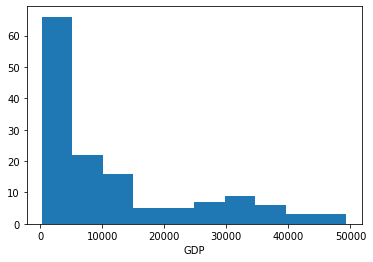

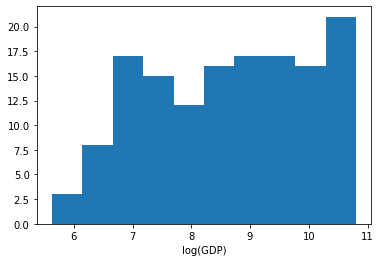

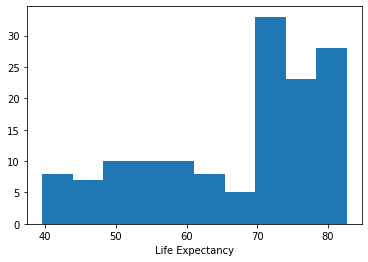

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# make sure the independent variable is the log of gdpPercap
x=gm_07['gdpPercap']
# specify the dependent variable as life expectancy
y=gm_07['lifeExp']

gdp_hist=plt.hist(x)  
plt.xlabel('GDP') 
plt.show()

gdp_hist=plt.hist(np.log(x))  
plt.xlabel('log(GDP)')  
plt.show()

gdp_hist=plt.hist(y)  
plt.xlabel('Life Expectancy')  
plt.show()


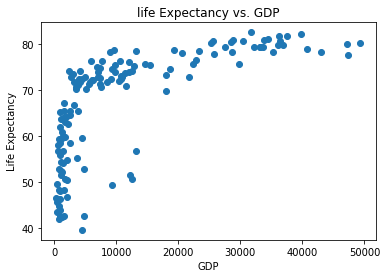

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline


# make sure the independent variable is the log of gdpPercap
x=gm_07['gdpPercap']
# specify the dependent variable as life expectancy
y=gm_07['lifeExp']

plt.scatter(x,y)  

plt.title('life Expectancy vs. GDP')  
plt.xlabel('GDP')  
plt.ylabel('Life Expectancy')  
plt.show()

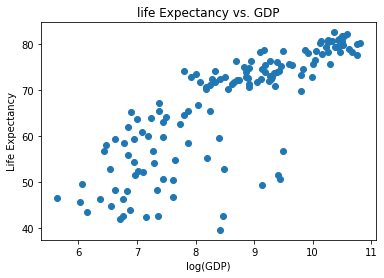

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline


# make sure the independent variable is the log of gdpPercap
x=np.log(gm_07['gdpPercap'])
# specify the dependent variable as life expectancy
y=gm_07['lifeExp']

plt.scatter(x,y)  

plt.title('life Expectancy vs. GDP')  
plt.xlabel('log(GDP)')  
plt.ylabel('Life Expectancy')  
plt.show()

### Regression Analysis
We can perform a basic linear regression analysis using both the scipy and a little bit of the numpy library.  The regression method uses least squares to optimize a model to approximate the relationship between the variables.   

In [8]:
from scipy import stats
import numpy as np

# make sure the independent variable is the log of gdpPercap
x=np.log(gm_07['gdpPercap'])
# specify the dependent variable as life expectancy
y=gm_07['lifeExp']

# use the linregress() function to generate the linear model (least squares regression)
lm=stats.linregress(x,y)
print(lm)

# customize the output referencing the linear model
print("Slope: ", round(lm.slope,2), "Intercept: ", round(lm.intercept,2))
print("Correlation: ",  round(lm.rvalue,2))
print("R-squared", round(lm.rvalue**2, 2))
print("p-value", lm.pvalue)

LinregressResult(slope=7.20280157101075, intercept=4.9496116510607635, rvalue=0.8089802514849213, pvalue=4.115370000557942e-34, stderr=0.44233933450709517)
Slope:  7.2 Intercept:  4.95
Correlation:  0.81
R-squared 0.65
p-value 4.115370000557942e-34


#### Some language for Interpreting Regression Output

- Slope: For each unit increase in the log(GDP) variable the model predicts a 7.2 year increase in the Country's life expectancy.  

- Correlation: There is a strong, positive, linear association between GDP and life expectancy.

- R-squared: 65% of the variation in Life Expectancy is explained by the linear regression predicting Life Expectancy from log(GDP)

- P-value: The p-value is approximately 0 meaning the observed relationship is unlikly to occur by chance.  It is more plausible to conclude that the observed relationship is a product of a meaningful phenomenon rather than random occurance. 


The regression output helps us quantify the relationship between the variables and evaluate the model as far as it's usefulness in predicting Life Expectancy from GDP.  The p-value suggests that the linear relationship is statistically significant (unlikely to happen by chance alone).  The R-squared value tells us that the linear model predicting Life Expectancy from GDP explains 65% of the variation in Life Expectancy.  In general, low p-value, high R-squared provides strong validation that the model is appropriate and meaningful for these data.  

#### Fitting a model to a scatterplot
We can use a tool from numpy called polynomial which will allow us to fit the linear model to the scatterplot.  

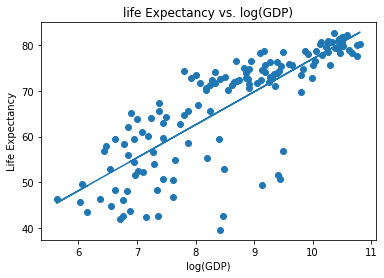

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.polynomial.polynomial import polyfit
import numpy as np

# make sure the independent variable is the log of gdpPercap
x=np.log(gm_07['gdpPercap'])
# specify the dependent variable as life expectancy
y=gm_07['lifeExp']

# Fit with polyfit
b, m = polyfit(x, y, 1)

plt.scatter(x,y)  
plt.plot(x, b + m * x, '-')
plt.title('life Expectancy vs. log(GDP)')  
plt.xlabel('log(GDP)')  
plt.ylabel('Life Expectancy')  
plt.show()

### Exercise
Make sure to download the excel data called 'Home_Values.xlsx' from Blackboard.  Use the read_excel function from pandas to read the data into the Jupyter Notebook.  Then perform a regression analysis on Home Price vs. Assessed Value using the methods illustrated above.  Make sure to interpret the output.  

In [12]:
import pandas as pd
home_values = pd.read_excel('Home_Values.xlsx', sheet_name='Data')

In [13]:
home_values.head()

,Assessed Value,Price ($000),Type,Time
0,178.17,194.10,0,10
1,180.24,201.90,0,10
2,174.03,188.65,1,11
3,186.31,215.50,1,2
4,175.22,187.50,1,5


#### Graphical Analysis
Create a scatterplot of Home Price vs. Assessed Value

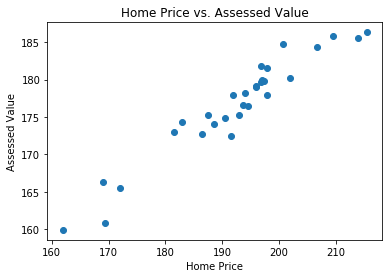

In [17]:
#  Make a scatterplot

%matplotlib inline


# make sure the independent variable is the log of gdpPercap
x1=home_values['Price ($000)']
# specify the dependent variable as life expectancy
y1=home_values['Assessed Value']

plt.scatter(x1,y1)  

plt.title('Home Price vs. Assessed Value')  
plt.xlabel('Home Price')  
plt.ylabel('Assessed Value')  
plt.show()




#### Linear Regression
Perform the linear regression analysis and examine the output

In [18]:
# Regression analysis

x2=np.log(home_values['Price ($000)'])
# specify the dependent variable as life expectancy
y2=home_values['Assessed Value']

# use the linregress() function to generate the linear model (least squares regression)
lm=stats.linregress(x2,y2)
print(lm)

# customize the output referencing the linear model
print("Slope: ", round(lm.slope,2), "Intercept: ", round(lm.intercept,2))
print("Correlation: ",  round(lm.rvalue,2))
print("R-squared", round(lm.rvalue**2, 2))
print("p-value", lm.pvalue)



LinregressResult(slope=97.858406892559, intercept=-337.8334471252057, rvalue=0.9647628120005217, pvalue=8.981569190266428e-18, stderr=5.043758191637607)
Slope:  97.86 Intercept:  -337.83
Correlation:  0.96
R-squared 0.93
p-value 8.981569190266428e-18


#### Interpreting Regression Output

- Slope: 


- Intercept: 


- Correlation: 


- R-squared: 


- P-value: 




#### Fit a line to the scatterplot
Use ployfit to approximate the relationship between home price and assessed value. 

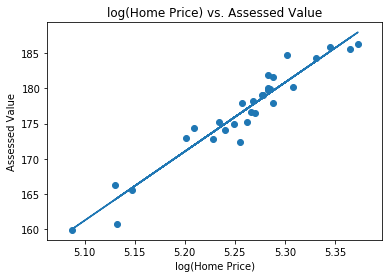

In [19]:
# fitting the model to the scatterplot


# Fit with polyfit
b, m = polyfit(x2, y2, 1)

plt.scatter(x2,y2)  
plt.plot(x2, b + m * x2, '-')
plt.title('log(Home Price) vs. Assessed Value')  
plt.xlabel('log(Home Price)')  
plt.ylabel('Assessed Value')    
plt.show()

## Intro to Classification with Iris Data
It seems impossible to escape the Iris Data Set.  Many courses in machine learning tend to start with this example.  There are several versions of this data set, but they all involve the same task.  The data set contains information about three species of irises.  

### Objectives
This lesson focuses on building a classifier using labeled data.  The classifier should then take in unlabeled data and output labels.  The classifier learns from the already labeled data called "training data".

#### k-Nearest Neighbors 
The k-nearest neighbors algorithm uses a certain number of closest labeled data points to predict the label of the unlabeled data point.

Start by importing the necessary modules.  

In [20]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the data and examine it's structure.

In [21]:
# load the iris dataset from datasets
iris = datasets.load_iris()
# examine the data and the data type
print(type(iris))
# since this is a dictionary, we can look at the keys
print(iris.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


Notice that the structure of the data set is a dictionary.  The 'data' key is the index of the data describind the features of the irises, sepal width, length and petal width,length.  

Define X as the data (sepal and petal measurements) and Y as the target (species coded as 0,1,2).

In [25]:
X = iris.data
Y = iris.target

print(type(X), type(Y))
print(X.shape, Y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(150, 4) (150,)


The species names are held in iris.target_names.

In [26]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [27]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [28]:
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()
df.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

We can take a look at the relationship between two of the quantitative variables by creating a scatterplot.  

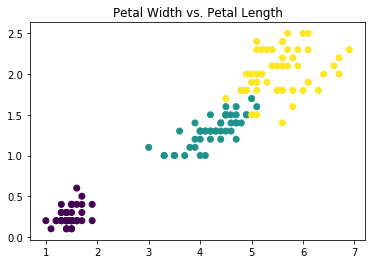

In [29]:
import matplotlib.pyplot as plt

x=df['petal_length']
y=df['petal_width']

plt.scatter(x, y, c=Y)
plt.title("Petal Width vs. Petal Length")
plt.show()

Seaborn can be a bit friendlier for plotting these types of data sets.  The following is another look at a scatterplot built with seaborn.  The legend and axis labels are created automatically. 

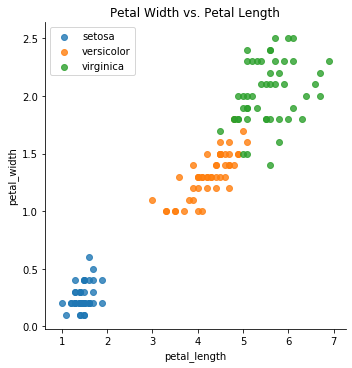

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
iris1 = sns.load_dataset("iris")

sns.lmplot(x="petal_length", y="petal_width", data=iris1, hue="species", fit_reg=False, legend=False)
plt.title("Petal Width vs. Petal Length")
plt.legend()
plt.show()

Because it will suit some of our future purposes, we will make the iris data into a pandas data frame using the feature names as the column names.

### Visualizing the Variables and Pairwise Scatterplots
We can use a function within pandas called scatter_matrix() in order to show the patterns in the individual variables along with the relationships between each pair of variables.  The c=Y colors the points according to the iris species (recall, Y is defined as iris.target)

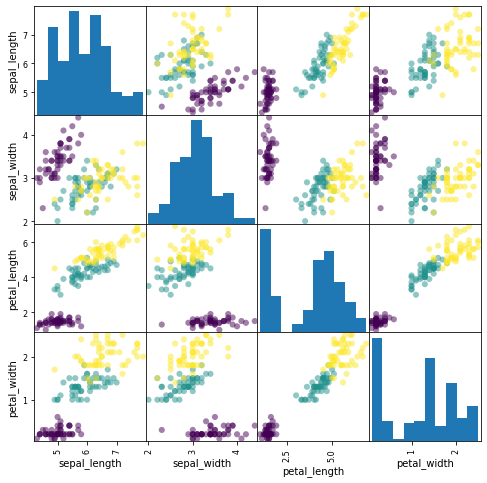

In [31]:
_=pd.plotting.scatter_matrix(df, c =Y, figsize = [8, 8], s=150, marker='.')

### Building the Classifier
Machine learning talks about "training" the model, this is no different from "fitting" a model.  This is accomplished using the .fit() method.  Once the model has been established, the .predict() method is used to predict the labels of new data. 

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

X = iris.data
Y = iris.target

knn.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

Next we can try out the classifier on a new datapoint that includes measurements for sepal_length=1, sepal_width=2, petal_length=3, petal_width=5.

In [33]:
#predict the label for a data point with the following measurements
X_new = np.array([[1, 2, 3, 5]])
prediction = knn.predict(X_new)

# The following will return a label for the new data point
print('Prediction {}'.format(iris.target_names[prediction]))

Prediction ['versicolor']


We will leave the classification topic here for now, but will continue to build some techniques.  

### Importing data from the UCI Machine Learning Archive.
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

In [34]:
import pandas as pd
url='https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
cars=pd.read_csv(url,header=None)

print('(rows, colums) =', df.shape, '\n')
cars.head()

(rows, colums) = (150, 4) 



,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Exercise
Find another dataset and practice reading the data into a pandas dataframe using the technique illustrated above.

In [58]:
wineurl = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine=pd.read_csv(wineurl,header=None)

print('(rows, colums) =', df.shape, '\n')
print(wine.head())

print(type(wine))
# since this is a dictionary, we can look at the keys
print(wine.keys())

(rows, colums) = (150, 4) 

   0      1     2     3     4    5     6     7     8     9     10    11    12  \
0   1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1   1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2   1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3   1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4   1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

     13  
0  1065  
1  1050  
2  1185  
3  1480  
4   735  
<class 'pandas.core.frame.DataFrame'>
Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')


In [59]:
x4=wine['petal_length']
y4=df['petal_width']

plt.scatter(x, y, c=Y)
plt.title("Petal Width vs. Petal Length")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'data'